## Modeling
In this notebook, we will be identifying which supervised and/or unsupervised machine learning techniques will work best with our project. We will build three predictive models and evaluate each of them through appropriate performance metrices to determine which model is the best. 

##### Imported our code from the previous notebooks

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data = data.drop(['id', 'site_id'], axis=1)

There is no need to create dummy features for my data because I am using the click column as my main variable, which is already numerical as 1 for when a click was present and 0 for when a click was not present. Creating dummy variables for any of the other columns wouldn't be helpful and would just make my data a lot larger when it's already very big. 

In [5]:
data.dtypes

click                int64
hour                 int64
C1                   int64
banner_pos           int64
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object

In [6]:
data.head()

,click,hour,C1,banner_pos,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102100,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,2,15706,320,50,1722,0,35,-1,79
1,0,14102100,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,15704,320,50,1722,0,35,100084,79
2,0,14102100,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,15704,320,50,1722,0,35,100084,79
3,0,14102100,1005,0,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,15706,320,50,1722,0,35,100084,79
4,0,14102100,1005,1,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,18993,320,50,2161,0,35,-1,157


In [7]:
data['click'].value_counts()

0    33563901
1     6865066
Name: click, dtype: int64

Creating a smaller dataset so my models will run.

In [8]:
data_0 = data[data['click']==0]
data_1 = data[data['click']==1]
print(data_0.shape, data_1.shape)

(33563901, 22) (6865066, 22)


In [9]:
data_0 = data_0.sample(frac=0.01, random_state=42)
data_0.shape

(335639, 22)

In [10]:
data_1 = data_1.sample(frac=0.03, random_state=42)
data_1.shape

(205952, 22)

In [11]:
data_sample = pd.concat([data_0, data_1], axis = 0, ignore_index=True)
data_sample['click'].value_counts()

0    335639
1    205952
Name: click, dtype: int64

There is also no need to standardize my values because most of them are categorical and the rest are unknown variables (C14 - C21). 

In [12]:
#Here I will create my training and testing data splits. 

from sklearn.model_selection import train_test_split

columns = ['hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
X = data_sample[columns]
y = data_sample.click

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((433272, 13), (108319, 13), (433272,), (108319,))

### First Model: Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [15]:
y_pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[65199  1929]
 [39774  1417]]


The confusion matrix shows:

True Positive + True Negative = 6712253 + 0 = 6712253
False Positive + False Negative = 0 + 1373541

Recall = 0.83,
Precision = 1,
Accuracy = 0.83

In [17]:
report = classification_report(y_test, y_pred)
lr_accuracy = accuracy_score(y_test, y_pred)
print(report)
print('Accuracy Score: ', lr_accuracy)

              precision    recall  f1-score   support

           0       0.62      0.97      0.76     67128
           1       0.42      0.03      0.06     41191

    accuracy                           0.61    108319
   macro avg       0.52      0.50      0.41    108319
weighted avg       0.55      0.61      0.49    108319

Accuracy Score:  0.6149982920817216


In [18]:
from sklearn.model_selection import cross_val_score

cv_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='roc_auc')
cv_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_test)
cv_test_mean = cv_test.mean()
cv_train_mean = cv_train.mean()
cv_test_std = cv_test.std()
print('Mean cross validation test score: ' +str(cv_test_mean))
print('Mean cross validation train score: ' +str(cv_train_mean))
print('Standard deviation in cv test scores: ' +str(cv_test_std))

[0.56904185 0.57170646 0.56874493 0.56117495 0.56779267]
Mean cross validation test score: 0.5676921711582379
Mean cross validation train score: 0.5684506178500486
Standard deviation in cv test scores: 0.0035079554870482425


### Second Model: Random Forest

In [19]:
columns = ['hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
X = data_sample[columns]
y = data_sample.click

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((433272, 13), (108319, 13), (433272,), (108319,))

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [21]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[50486 16642]
 [22593 18598]]


In [22]:
report = classification_report(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
print(report)
print('Accuracy Score: ', rf_accuracy)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     67128
           1       0.53      0.45      0.49     41191

    accuracy                           0.64    108319
   macro avg       0.61      0.60      0.60    108319
weighted avg       0.63      0.64      0.63    108319

Accuracy Score:  0.6377828451148921


In [23]:
cv_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_test)
cv_test_mean = cv_test.mean()
cv_train_mean = cv_train.mean()
cv_test_std = cv_test.std()
print('Mean cross validation test score: ' +str(cv_test_mean))
print('Mean cross validation train score: ' +str(cv_train_mean))
print('Standard deviation in cv test scores: ' +str(cv_test_std))

[0.63983914 0.63203599 0.64046306 0.63785728 0.64052348]
Mean cross validation test score: 0.6381437886637685
Mean cross validation train score: 0.6528238289912107
Standard deviation in cv test scores: 0.0032032318344256297


##### Comparing Models
My Random Forest model had better results than the Logistic Regression model, especially for the minority click group. Therefore, I will try a Gradient Boosting model next, rather than a Decision Tree model, and identify which model of the three is the best.

### Third Model: Gradient Boosting

In [24]:
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

In [25]:
#testing different learning rates to find the most optimal one
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.631
Accuracy score (validation): 0.631

Learning rate:  0.1
Accuracy score (training): 0.643
Accuracy score (validation): 0.644

Learning rate:  0.25
Accuracy score (training): 0.647
Accuracy score (validation): 0.649

Learning rate:  0.5
Accuracy score (training): 0.648
Accuracy score (validation): 0.651

Learning rate:  0.75
Accuracy score (training): 0.650
Accuracy score (validation): 0.653

Learning rate:  1
Accuracy score (training): 0.650
Accuracy score (validation): 0.654



In [26]:
#now I apply the best learning rate found previously, which is 1.
bestgb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
bestgb.fit(X_train, y_train)
y_pred = bestgb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(gb_accuracy)

[[60186  6942]
 [30531 10660]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76     67128
           1       0.61      0.26      0.36     41191

    accuracy                           0.65    108319
   macro avg       0.63      0.58      0.56    108319
weighted avg       0.64      0.65      0.61    108319

0.6540496127179903


In [27]:
cv_test= cross_val_score(bestgb,X_test,y_test,cv=5,scoring='roc_auc')
cv_train= cross_val_score(bestgb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_test)
cv_test_mean = cv_test.mean()
cv_train_mean = cv_train.mean()
cv_test_std = cv_test.std()
print('Mean cross validation test score: ' +str(cv_test_mean))
print('Mean cross validation train score: ' +str(cv_train_mean))
print('Standard deviation in cv test scores: ' +str(cv_test_std))

[0.67245329 0.66695963 0.67128813 0.67956636 0.67452751]
Mean cross validation test score: 0.6729589833945869
Mean cross validation train score: 0.6681433491516522
Standard deviation in cv test scores: 0.004126920509444569


In [28]:
#comparison of accuracy scores for all 

print('Logistic Regression Accuracy Score: ', lr_accuracy)
print('Random Forest Accuracy Score: ', rf_accuracy)
print('Gradient Boosting Accuracy Score: ', gb_accuracy)

Logistic Regression Accuracy Score:  0.6149982920817216
Random Forest Accuracy Score:  0.6377828451148921
Gradient Boosting Accuracy Score:  0.6540496127179903


### Using balanced data for all three models

Because we did not receive amazing performance metric results, we will try RandomOverSampler from Imbalanced-learn to create new x and y, in which the data are more balanced. I will fit the three models to the new training sets and test the new testing sets to see if we get better scores.

In [29]:
from imblearn.over_sampling import RandomOverSampler 
randomsample = RandomOverSampler()
X_new, y_new = randomsample.fit_resample(X, y)

Original dataset shape  Counter({0: 335639, 1: 205952})
Resampled dataset shape Counter({0: 335639, 1: 335639})


C:\Users\amand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


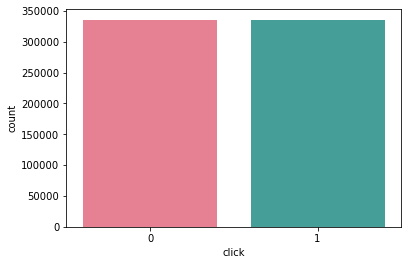

In [30]:
from collections import Counter
print('Original dataset shape  {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new, palette='husl')
plt.show()

In [31]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=100, stratify=y_new)

In [32]:
print(X_new_train.shape, X_new_test.shape, y_new_train.shape, y_new_test.shape)

(537022, 13) (134256, 13) (537022,) (134256,)


#### Logstic Regression Model with Balanced Data

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', random_state=0)
lr.fit(X_new_train, y_new_train)
y_new_pred = lr.predict(X_new_test)

In [34]:
report = classification_report(y_new_test, y_new_pred)
lr_accuracy = accuracy_score(y_new_test, y_new_pred)
print(report)
print('Accuracy Score: ', lr_accuracy)

              precision    recall  f1-score   support

           0       0.58      0.64      0.61     67128
           1       0.60      0.53      0.56     67128

    accuracy                           0.59    134256
   macro avg       0.59      0.59      0.59    134256
weighted avg       0.59      0.59      0.59    134256

Accuracy Score:  0.5881152425217495


#### Random Forest Model with Balanced Data

In [35]:
rf = RandomForestClassifier()
rf.fit(X_new_train, y_new_train)
y_new_pred = rf.predict(X_new_test)

In [36]:
report = classification_report(y_new_test, y_new_pred)
rf_accuracy = accuracy_score(y_new_test, y_new_pred)
print(report)
print('Accuracy Score: ', rf_accuracy)

              precision    recall  f1-score   support

           0       0.68      0.63      0.65     67128
           1       0.66      0.71      0.68     67128

    accuracy                           0.67    134256
   macro avg       0.67      0.67      0.67    134256
weighted avg       0.67      0.67      0.67    134256

Accuracy Score:  0.6680073888690263


In [37]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Gradient Boosting Model with Balanced Data

In [38]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_new_train, y_new_train)
    print("Learning rate: ", rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_new_train, y_new_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_new_test, y_new_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.593
Accuracy score (validation): 0.594

Learning rate:  0.1
Accuracy score (training): 0.597
Accuracy score (validation): 0.599

Learning rate:  0.25
Accuracy score (training): 0.605
Accuracy score (validation): 0.607

Learning rate:  0.5
Accuracy score (training): 0.614
Accuracy score (validation): 0.613

Learning rate:  0.75
Accuracy score (training): 0.621
Accuracy score (validation): 0.621

Learning rate:  1
Accuracy score (training): 0.623
Accuracy score (validation): 0.622



In [39]:
bestgb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
bestgb.fit(X_new_train, y_new_train)
y_new_pred = bestgb.predict(X_new_test)
gb_accuracy = accuracy_score(y_new_test, y_new_pred)
print(confusion_matrix(y_new_test, y_new_pred))
print(classification_report(y_new_test, y_new_pred))
print(gb_accuracy)

[[38343 28785]
 [21907 45221]]
              precision    recall  f1-score   support

           0       0.64      0.57      0.60     67128
           1       0.61      0.67      0.64     67128

    accuracy                           0.62    134256
   macro avg       0.62      0.62      0.62    134256
weighted avg       0.62      0.62      0.62    134256

0.6224228339887975


##### Analysis: 

The Random Forest with randomoversampling method is the most accurate and had the best scores. However, the scores are not ideal because they are all around 0.6. Now that I have made the scores pretty even between the click values 0 and 1, I will try to hyperparameterize to find the best parameters to get better scores. 

#### Parametric Tuning, applying GridsearchCV for hyperparameter tuning for Random Forest Model

In [40]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Here we tried to several different hyperparameter tuning methods to acquire the best hyperparameters, but they wouldn't finish running. 

In [41]:
# rf = RandomForestClassifier()
# forest_params = {'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']}
# halving_cv = HalvingGridSearchCV(rf, forest_params)
# halving_cv.fit(X_new_train, y_new_train)
# print(halving_cv.best_params_)

In [42]:
# rf = RandomForestClassifier()
# forest_params = {'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']}
# clf = GridSearchCV(rf, forest_params, scoring='accuracy', cv=3)
# clf.fit(X_new_train, y_new_train)
# print(clf.best_params_)

In [43]:
# rf = RandomForestClassifier()

# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 60, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_new_train, y_new_train)
# print(rf_random.best_params_)

In [44]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
forest_params = {'n_estimators': [200,300,400,500,600]}
clf = GridSearchCV(rf, forest_params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
clf.fit(X_new_train, y_new_train)
print(clf.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'n_estimators': 200}


Therefore, we simplified our GridSearchCV to get the best number of estimators, which was 600. We will tune our random forest model to the new set of optimized parameters.

#### Fitting Random Forest model with Optimal Hyperparameters

In [45]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            verbose=1, random_state=None, warm_start=False, oob_score=False)
rf.fit(X_new_train, y_new_train)
y_new_pred = rf.predict(X_new_test)
acc = accuracy_score(y_new_test, y_new_pred)
cv = cross_val_score(rf, X_new_test, y_new_test,scoring='roc_auc').mean()
print(acc)
print(cv)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.6min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    2.1s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    5.6s
[Parallel(n_jobs=20)]: Done 600 out of 600 | elapsed:    8.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   20.

0.6685138839232511
0.6650998192689376


[Parallel(n_jobs=20)]: Done 600 out of 600 | elapsed:    0.8s finished


### Feature Importances

In [46]:
columns = ['hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
features = data_sample[columns]
y = data_sample.click
X = features

In [47]:
features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

            Features  Importance scores
0               hour           0.008086
1                 C1           0.008771
2         banner_pos           0.014281
3        device_type           0.016927
4   device_conn_type           0.024372
5                C14           0.025311
6                C15           0.028052
7                C16           0.028483
8                C17           0.042065
9                C18           0.052380
10               C19           0.097249
11               C20           0.125926
12               C21           0.528097


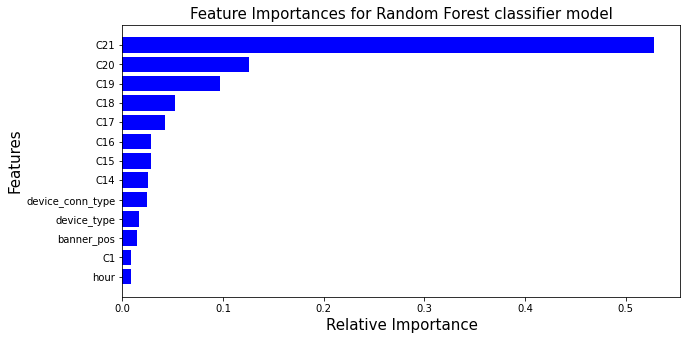

In [48]:
#visual of Feature Importances:

plt.figure(figsize=(10,5))

index = [0,1,2,3,4,5,6,7,8,9,10,11,12]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("28.png")
plt.show()

### ROC-AUC Score and ROC Curve for Random Forest Model

In [49]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_new_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_new_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    2.2s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    5.7s


ROC-AUC Score: 0.7247564503128874


[Parallel(n_jobs=20)]: Done 600 out of 600 | elapsed:    8.3s finished


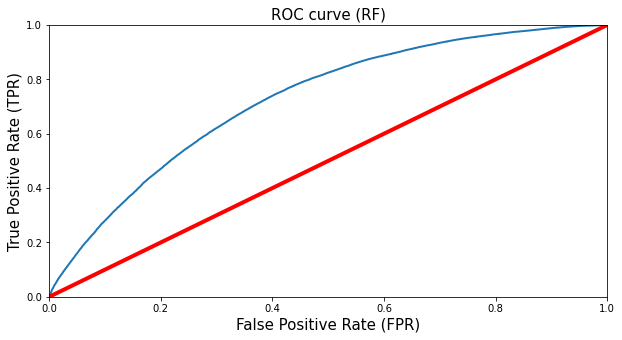

In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_new_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

### Conclusion
Based on our results, our values weren't the best, but they were decent enough. We chose the best model and parameters that we could find through our analysis. The best model was Random Forest Model, while using GridSearchCV for hyperparameter tuning. We can conclude that (unknown) feature C21 is the most predictive in predicting click through rate for an online advertisement with our model accuracy score being 0.67 and our ROC-AUC score of 0.72. 